In [94]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.regularizers import L2
%matplotlib widget
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

In [2]:
import os
LD_LIBRARY_PATH = '/home/humus/anaconda3/lib/'
print(os.path.exists(os.path.join(LD_LIBRARY_PATH, "libcudart.so.11.0")))

True


In [95]:
from mnist import MNIST

mndata = MNIST('samples')

# images, labels = mndata.load_training()
# # or
# images, labels = mndata.load_testing()


In [96]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    ### START CODE HERE ### 
    a = np.exp(z);
    a = a / np.sum(a);
    ### END CODE HERE ### 
    return a

In [98]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [99]:
# load training dataset
X, y = mndata.load_training()

In [100]:
X = np.array(X)

y = np.array(y)
y = y.reshape([-1, 1])
y.shape

(60000, 1)

In [101]:
X_test, y_test = mndata.load_testing()
X_test = np.array(X_test)

y_test = np.array(y_test)
y_test = y_test.reshape([-1, 1])
y_test.shape

(10000, 1)

In [102]:
print (f'Checking the format of X:{X[0]} \n shape = {X.shape}')

Checking the format of X:[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 2

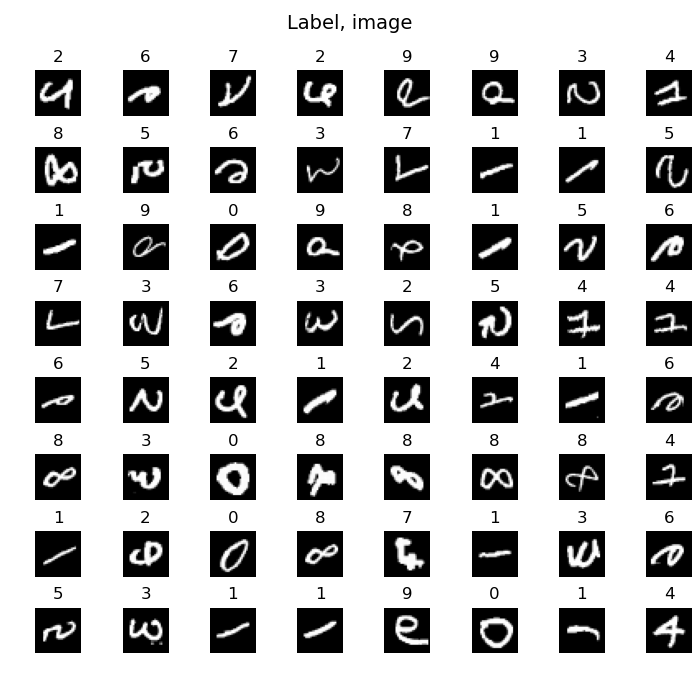

In [53]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(7, 7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Pick random images
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [107]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(784,)),
        Dense(units = 25, activation = 'relu', kernel_regularizer = L2(0.01)),
        Dense(units = 15, activation = 'relu', kernel_regularizer = L2(0.01)),
        Dense(units = 10, activation = 'linear', kernel_regularizer = L2(0.01))
        ### END CODE HERE ### 
    ], name = "my_model" 
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 25)                19625     
                                                                 
 dense_10 (Dense)            (None, 15)                390       
                                                                 
 dense_11 (Dense)            (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3220
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9633
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6549
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4125
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3431
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3166
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3034
Epoch 8/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2968
Epoch 9/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2942
Epoch 10/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2876
Epoch 11/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2878
Epoch 12/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2826
E

In [109]:
random_img = X[1024]

prediction = model.predict(random_img.reshape(1,784))  # prediction

print(f" predicting for : \n{y[1024]}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 70ms/step
 predicting for : 
[5]
 Largest Prediction index: 5


In [110]:
# find incorrect predictions
# errors = 0
# for train_idx in range(len(X_test)):
#     data_point = X[train_idx]
#     prediction = model.predict(data_point.reshape(1,784))  # prediction
#     predicted_digit = np.argmax(prediction);
#     actual_digit = y[train_idx]
#     if actual_digit != predicted_digit:
#         errors += 1

In [111]:
print(f'Total errors = {errors}')

Total errors = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [112]:
565 / len(X_test) * 100

5.65

In [113]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [114]:
predicted_digits = list(map(np.argmax, predictions))

In [115]:
errors = [0 if predicted == actual else 1 for (predicted, actual) in zip(predicted_digits, y_test)]

In [116]:
np.sum(errors) / len(errors) * 100

4.9